In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
players = pd.read_csv('players.csv')
sessions = pd.read_csv('sessions.csv')

In [41]:
data = pd.merge(players, sessions, on='hashedEmail', how='inner')

data['High_Playtime'] = (data['played_hours'] > 10).astype(int)

encoder = LabelEncoder()
data['experience'] = encoder.fit_transform(data['experience'])
data['gender'] = encoder.fit_transform(data['gender'])

features = ['experience', 'subscribe', 'gender', 'age']
X = data[features]
y = data['High_Playtime']

In [42]:
scaler = StandardScaler()
X[['age']] = scaler.fit_transform(X[['age']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/tmp/ipykernel_93/3563929826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age']] = scaler.fit_transform(X[['age']])


In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76        49
           1       0.93      1.00      0.96       258

    accuracy                           0.94       307
   macro avg       0.97      0.81      0.86       307
weighted avg       0.94      0.94      0.93       307



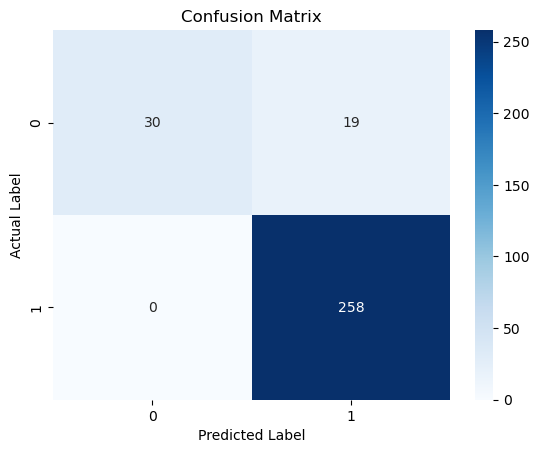

In [44]:
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [45]:
print(players.columns)


Index(['experience', 'subscribe', 'hashedEmail', 'played_hours', 'name',
       'gender', 'age', 'individualId', 'organizationName'],
      dtype='object')


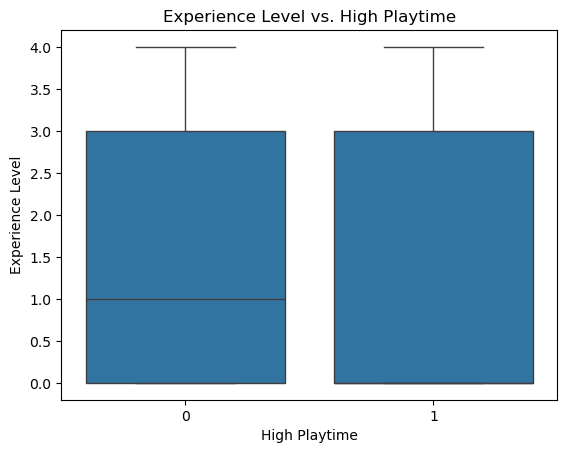

In [46]:
sns.boxplot(x='High_Playtime', y='experience', data=data)
plt.xlabel('High Playtime')
plt.ylabel('Experience Level')
plt.title('Experience Level vs. High Playtime')
plt.show()

# Experience Level    
# 0: 'Beginner'
# 1: 'Amateur'
# 2: 'Regular'
# 3: 'Veteran'
# 4: 'Pro'

In [47]:
# 1. Confusion Matrix
"""
Confusion Matrix:
- True Positives (TP): 258 players correctly predicted as "high playtime."
- True Negatives (TN): 30 players correctly predicted as "low playtime."
- False Positives (FP): 19 players wrongly predicted as "high playtime" when they’re actually "low playtime."
- False Negatives (FN): 0 players missed as "high playtime" (none were wrongly predicted as "low playtime").

We can see how well the model is at classifying players into high and low playtime categories
Low number of false positives and negatives means the model is performing well
"""

# 2. Precision, Recall, F1-Score
"""
Precision, Recall, F1-Score:
- Precision: Measures how many of the predicted "high playtime" players actually are. 
  - For high playtime (1), precision is 0.93, meaning 93% of predicted high playtime players were correct.
- Recall: Measures how well the model identifies actual "high playtime" players.
  - For high playtime (1), recall is 1.00, meaning the model correctly identified all true high playtime players.
- F1-Score: A balance between precision and recall. The F1-score for high playtime (1) is 0.96, showing a good balance.

For low playtime (0), precision is 1.00, but recall is 0.61. This means the model is good at identifying low playtime players, but it misses some
"""

# 3. Boxplot
"""
Boxplot:
- Boxplot: Shows the distribution of data using quartiles and whiskers. 
  The box represents the interquartile range (middle 50% of the data), the line in the box is the median (middle value), 
  and the "whiskers" extend to show the range (except outliers).
- Low Playtime:
  - Median line is visible in the box, showing where the middle value of playtime is for low playtime players.
  - whiskers show the spread of the rest of the data (values that aren't considered outliers).
- High Playtime:
  - *Median line is missing/can't see: it could be due to all players in the high playtime group having similar playtime, making the median not clearly visible
  - This might also happen if distribution of high playtime values is narrow, so the plot doesn’t show a distinct median.

Horizontal line for low playtime only - this is what chatgpt said when i asked why
- The low playtime boxplot has a well-defined median and distribution, while the high playtime group may have less variation
- Not rly sure what this means tho

SyntaxError: incomplete input (808260119.py, line 26)